# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D    DMG      H   MIT    GAME
0   0   7   3   6   5933   1068  6199  DEFEAT
    1   7   0  10   3601    747     0  DEFEAT
    2   9   1   6   4352      0     0  DEFEAT
    3   7   7   2   2332   6325     0  DEFEAT
    4   6   4   2   3410   5979   606  DEFEAT
...    ..  ..  ..    ...    ...   ...     ...
396 5  15   1  13   8895      0  7164  DEFEAT
    6  14   1  10   9021    264     0  DEFEAT
    7  17   2   8  13526      0   317  DEFEAT
    8   1  15   8   1703  10138   178  DEFEAT
    9   5  14   4   2553  14656     0  DEFEAT

[3970 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3970 entries, (0, 0) to (396, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       3970 non-null   int64 
 1   A       3970 non-null   int64 
 2   D       3970 non-null   int64 
 3   DMG     3970 non-null   int64 
 4   H       3970 non-null   int64 
 5   MIT     3970 non-null   int64 
 6   GAME    3970 non-null   object
dtypes: int64(6), object(1)
memory usage: 248.4+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000
mean,13.442569,7.108564,6.319647,6122.631234,3827.223678,2311.051889
std,9.555337,8.120754,3.890585,4330.895671,5451.327853,4563.115065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2675.250000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5326.000000,700.000000,304.500000
75%,19.000000,11.000000,9.000000,9031.250000,7322.750000,1826.750000
max,58.000000,54.000000,21.000000,26666.000000,130174.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


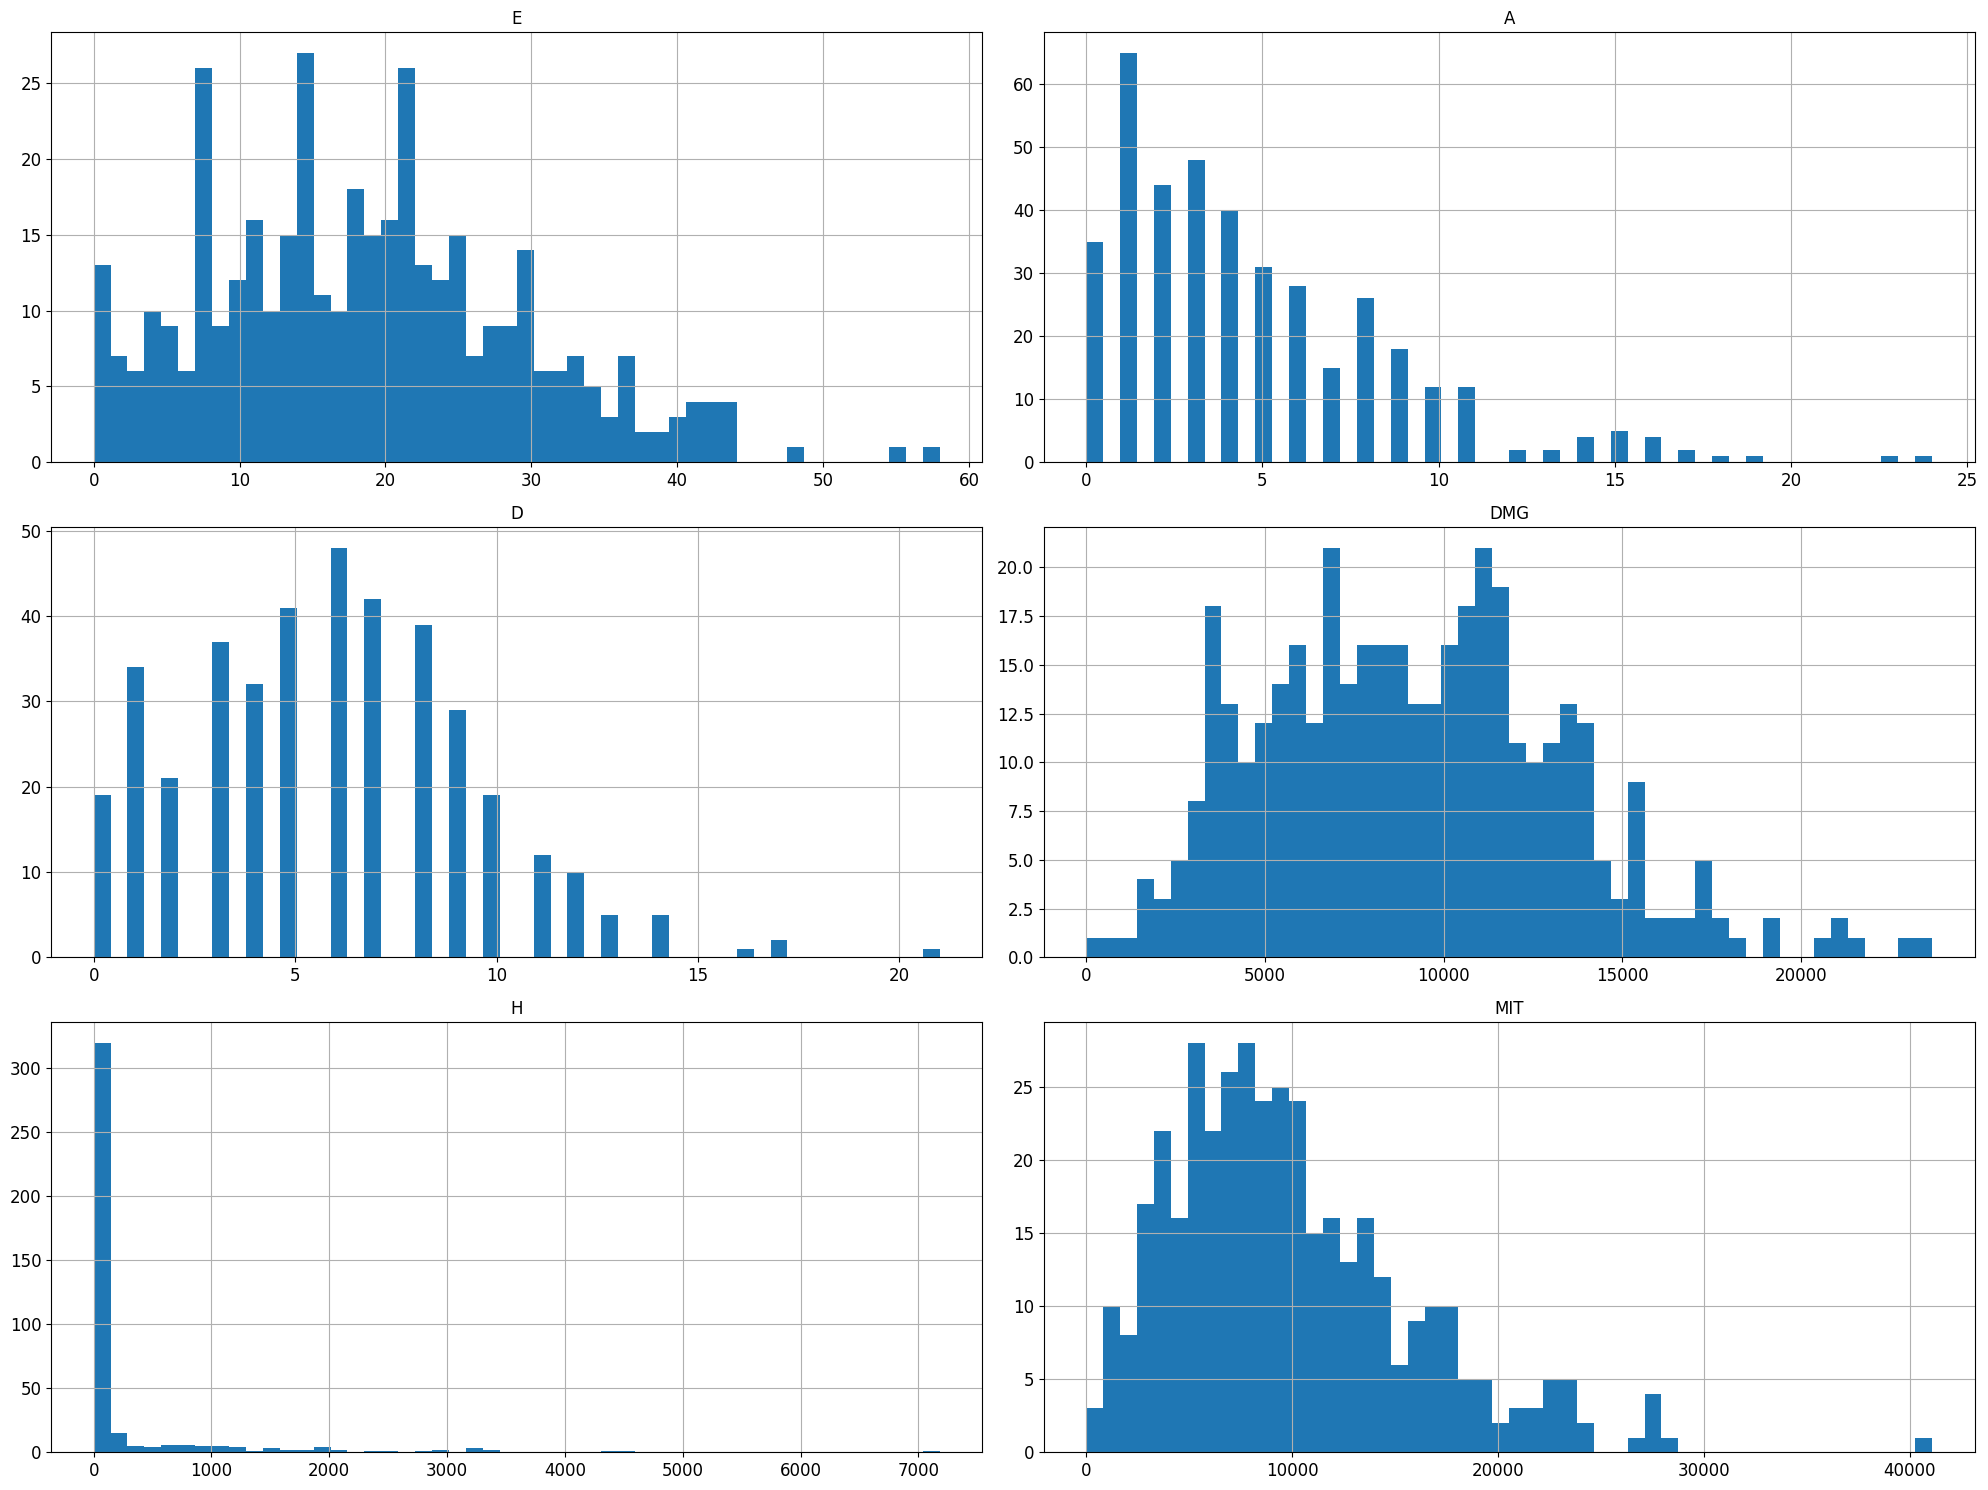

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


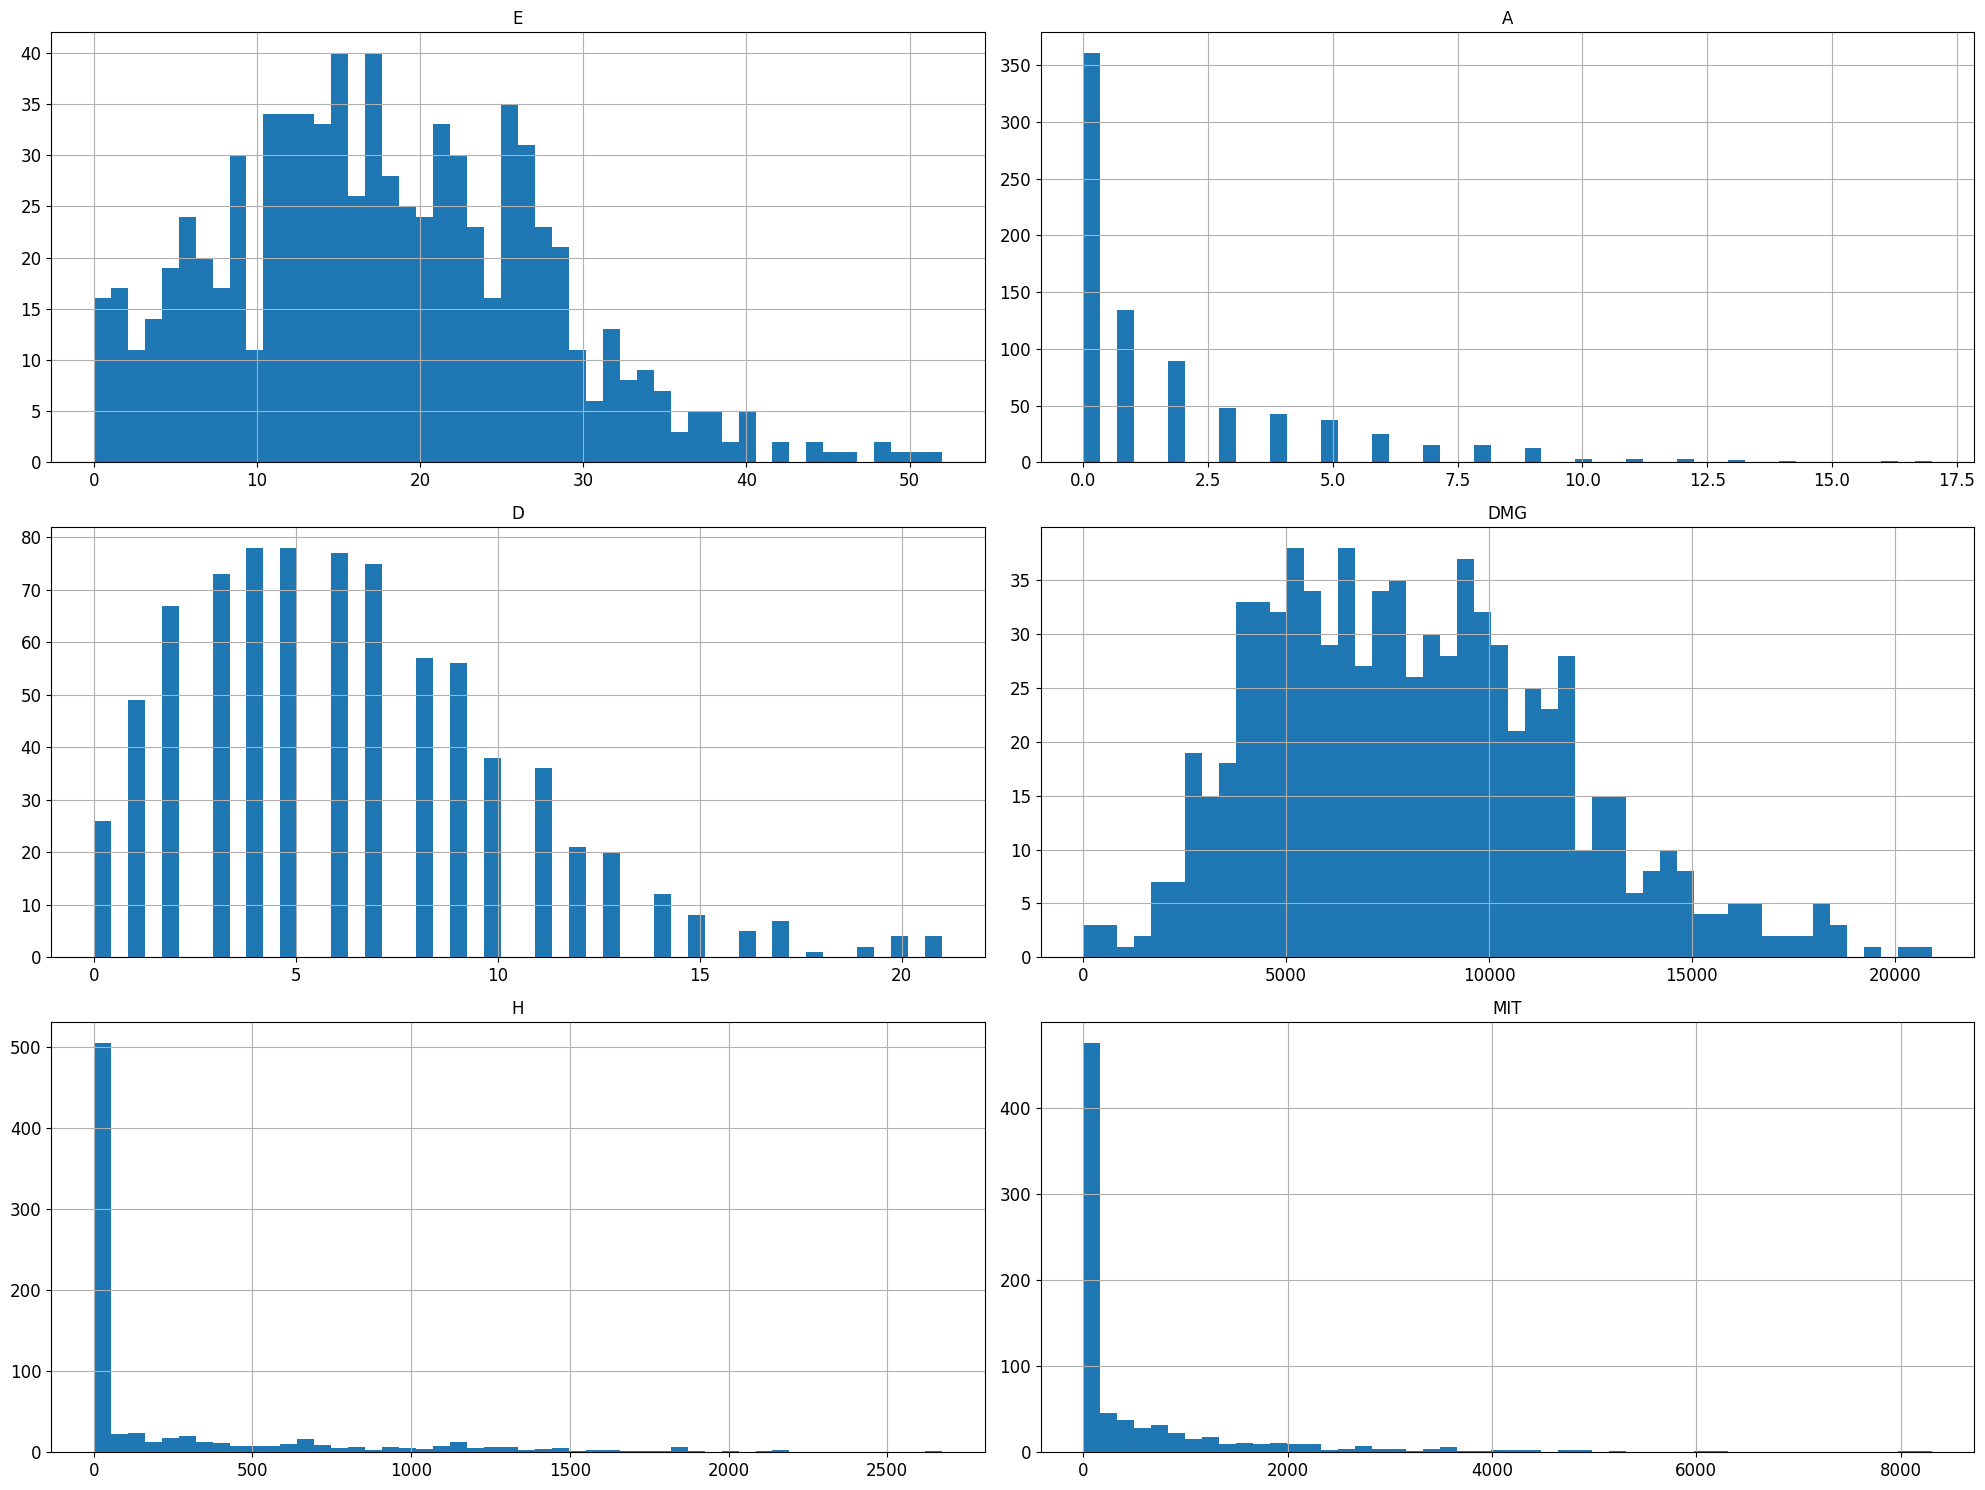

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


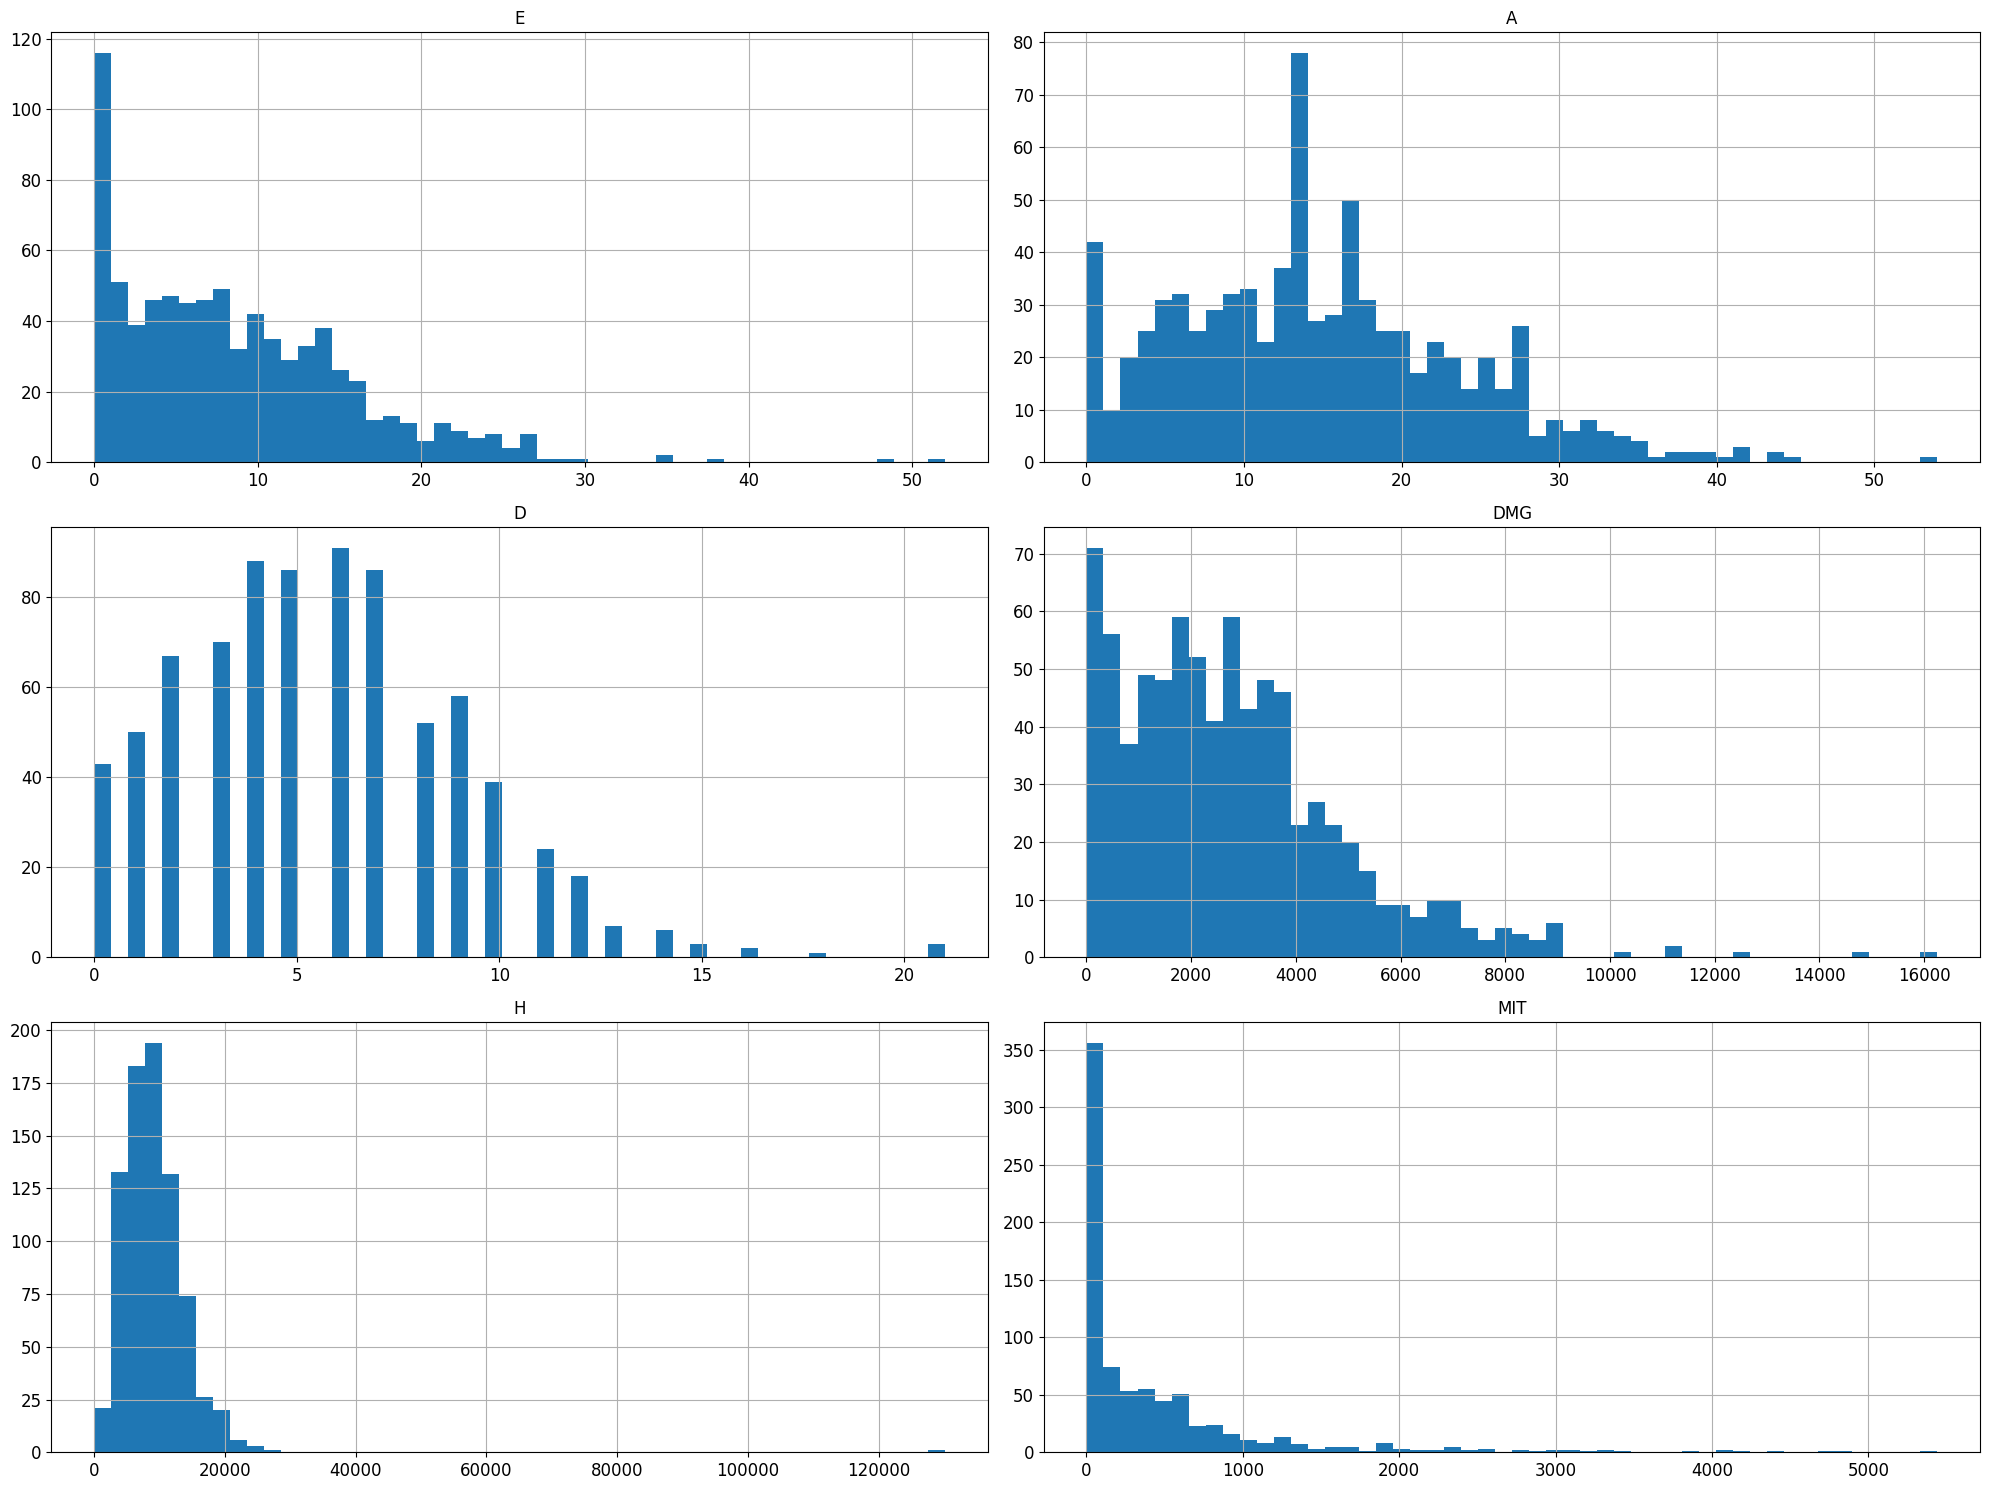

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A  D    DMG     H    MIT     GAME
280 0  15   2  5   8310     0  14974  VICTORY
    1  18   0  3   5077     0      0  VICTORY
    2  25   1  4   9539     0     27  VICTORY
    3  12  12  5   2306  6034    734  VICTORY
    4   3  24  4    961  8298      0  VICTORY
...    ..  .. ..    ...   ...    ...      ...
76  5  27  10  2   8906     0   7305  VICTORY
    6  27   0  5  13383   507      0  VICTORY
    7  33   0  4   8965     0      0  VICTORY
    8   1  28  3    272  8722      0  VICTORY
    9   8  20  3   2123  9851      0  VICTORY

[3970 rows x 7 columns]

In [10]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [11]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
280 0  0.258621  0.037037  0.238095  0.311633  0.000000  0.357810
    1  0.310345  0.000000  0.142857  0.190392  0.000000  0.000000
    2  0.431034  0.018519  0.190476  0.357721  0.000000  0.000645
    3  0.206897  0.222222  0.238095  0.086477  0.046353  0.017539
    4  0.051724  0.444444  0.190476  0.036038  0.063745  0.000000
...         ...       ...       ...       ...       ...       ...
76  5  0.465517  0.185185  0.095238  0.333983  0.000000  0.174556
    6  0.465517  0.000000  0.238095  0.501875  0.003895  0.000000
    7  0.568966  0.000000  0.190476  0.336196  0.000000  0.000000
    8  0.017241  0.518519  0.142857  0.010200  0.067003  0.000000
    9  0.137931  0.370370  0.142857  0.079614  0.075676  0.000000

[3970 rows x 6 columns]

In [12]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(397, 60)
(397,)


In [13]:
from sklearn import ensemble, linear_model, neighbors, neural_network, svm, tree, model_selection
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=800, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(2., n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=1600),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(nu=.0625),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(LogisticRegression(n_jobs=-1), 0.904240506329114),
 (ExtraTreesClassifier(n_jobs=-1), 0.901740506329114),
 (RidgeClassifier(), 0.8992405063291139),
 (RidgeClassifierCV(), 0.8992405063291139),
 (LinearSVC(dual='auto'), 0.8991772151898735),
 (SVC(), 0.8967088607594936),
 (KNeighborsClassifier(n_jobs=-1), 0.894113924050633),
 (RandomForestClassifier(n_jobs=-1), 0.8916772151898733),
 (LogisticRegressionCV(max_iter=800, n_jobs=-1), 0.8890506329113924),
 (NearestCentroid(), 0.8890506329113924),
 (HistGradientBoostingClassifier(), 0.8841455696202531),
 (SGDClassifier(n_jobs=-1), 0.8814873417721518),
 (GradientBoostingClassifier(), 0.8791139240506329),
 (NuSVC(nu=0.0625), 0.8765506329113923),
 (AdaBoostClassifier(), 0.8665189873417722),
 (Perceptron(n_jobs=-1), 0.866518987341772),
 (MLPClassifier(max_iter=1600), 0.8663924050632911),
 (BaggingClassifier(n_jobs=-1), 0.8640189873417722),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8637974683544304),
 (DecisionTreeClassifier(), 0.815886075949367

In [14]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [15]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances[tanks] = importances[tanks].sum(0) / 2
        importances[damages] = importances[damages].sum(0) / 4
        importances[supports] = importances[supports].sum(0) / 4
        joblib.dump(importances, 'importances.joblib')

        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0) / 2
        importances_supports = importances[supports].sum(0) / 2

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tanks.sum(), importances_damages.sum(), importances_supports.sum()), ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.0f}%')

        break

ExtraTreesClassifier(n_jobs=-1)

**특성 중요도**
처치: 29%
죽음: 28%
도움: 21%
피해: 9%
경감: 7%
치유: 7%

**1인 돌격 특성 중요도**
처치: 10%
죽음: 9%
도움: 4%
피해: 2%
경감: 1%
치유: 1%

**1인 공격 특성 중요도**
처치: 6%
죽음: 4%
피해: 2%
도움: 2%
치유: 1%
경감: 1%

**1인 지원 특성 중요도**
도움: 6%
죽음: 5%
처치: 3%
치유: 2%
피해: 2%
경감: 1%

**1인 역할 중요도**
돌격: 27%
지원: 20%
공격: 17%


In [16]:
index = 0
contributions = X[index].reshape(players, features).copy()
contributions[:, 2] = 1 - contributions[:, 2]
contributions *= importances
contributions = contributions.sum(1)
contributions[tanks] *= 2 / contributions[tanks].sum()
contributions[damages] *= 4 / contributions[damages].sum()
contributions[supports] *= 4 / contributions[supports].sum()

print('<Contributions>')
print(f'TEAM 1:', end='')
for contribution in contributions[:5]:
    print(f' {contribution:.2f}', end='')
print(f'\nTEAM 2:', end='')
for contribution in contributions[5:]:
    print(f' {contribution:.2f}', end='')

original_index = y.index[index][0]
print(f'\n\n{find_file(original_index)}')
print(scoreboards.loc[original_index])

<Contributions>
TEAM 1: 1.12 1.08 1.25 1.06 1.23
TEAM 2: 0.88 0.83 0.84 0.82 0.88

VICTORY (76)
    E   A  D   DMG     H    MIT     GAME
0  15   2  5  8310     0  14974  VICTORY
1  18   0  3  5077     0      0  VICTORY
2  25   1  4  9539     0     27  VICTORY
3  12  12  5  2306  6034    734  VICTORY
4   3  24  4   961  8298      0  VICTORY
5  11   1  8  6639     0  10691   DEFEAT
6  15   0  9  6632     0    922   DEFEAT
7  10   3  6  5952     0      0   DEFEAT
8   6  10  8  1499  6009    473   DEFEAT
9   3  15  8   388  7882      0   DEFEAT


In [17]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=[total_features]))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(3, 'softmax'))
model.summary()

2023-11-06 11:52:16.319331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 11:52:17.588907: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 11:52:17.617218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 11:52:17.617481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 48703 (190.25 KB)
Trainable params: 48703 (190.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


r/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 11:52:17.741115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 11:52:17.741351: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 11:52:17.741364: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1726] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2023-11-06 11:52:17.741562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to r

In [18]:
from tensorflow.keras import optimizers, callbacks

encoder = preprocessing.LabelEncoder()
model.compile('sgd', 'sparse_categorical_crossentropy', ['accuracy'])
history = model.fit(
    X,
    encoder.fit_transform(y),
    epochs=100,
    verbose=2,
    callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
    validation_split=.1
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/100


2023-11-06 11:52:19.074314: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-06 11:52:19.089004: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4474830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-06 11:52:19.089047: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-11-06 11:52:19.111522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-06 11:52:19.123546: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-06 11:52:19.167425: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 - 1s - loss: 1.0027 - accuracy: 0.5238 - val_loss: 0.9536 - val_accuracy: 0.4500 - 880ms/epoch - 73ms/step
Epoch 2/100
12/12 - 0s - loss: 0.9151 - accuracy: 0.5238 - val_loss: 0.8836 - val_accuracy: 0.4500 - 73ms/epoch - 6ms/step
Epoch 3/100
12/12 - 0s - loss: 0.8522 - accuracy: 0.5238 - val_loss: 0.8301 - val_accuracy: 0.4750 - 66ms/epoch - 5ms/step
Epoch 4/100
12/12 - 0s - loss: 0.8058 - accuracy: 0.5294 - val_loss: 0.7894 - val_accuracy: 0.5250 - 60ms/epoch - 5ms/step
Epoch 5/100
12/12 - 0s - loss: 0.7705 - accuracy: 0.5658 - val_loss: 0.7553 - val_accuracy: 0.5750 - 60ms/epoch - 5ms/step
Epoch 6/100
12/12 - 0s - loss: 0.7407 - accuracy: 0.6162 - val_loss: 0.7254 - val_accuracy: 0.6750 - 65ms/epoch - 5ms/step
Epoch 7/100
12/12 - 0s - loss: 0.7165 - accuracy: 0.7059 - val_loss: 0.6998 - val_accuracy: 0.7250 - 62ms/epoch - 5ms/step
Epoch 8/100
12/12 - 0s - loss: 0.6939 - accuracy: 0.7423 - val_loss: 0.6772 - val_accuracy: 0.8250 - 64ms/epoch - 5ms/step
Epoch 9/100
12/12 - 0s - l

(0.24780645966529846, 0.925000011920929)

In [19]:
import numpy as np

probas = model.predict(X)
predictions = encoder.inverse_transform(np.argmax(probas, 1))
for i, (label, prediction) in enumerate(zip(y, predictions)):
    if label != prediction:
        index = y.index[i][0]
        print(
            f'\n{find_file(index)} - 패 {probas[i][0] * 100:.0f}% - 무 {probas[i][1] * 100:.0f}% - 승 {probas[i][2] * 100:.0f}%'
        )
        print(scoreboards.loc[index])

13/13 [==============================] - 0s 1ms/step

VICTORY (132) - 패 66% - 무 33% - 승 1%
    E   A  D   DMG     H    MIT     GAME
0  11   1  6  7065     0  10380  VICTORY
1  11   0  2  6715     0   1295  VICTORY
2  16   3  5  6582     0      0  VICTORY
3   8   8  3  3193  7619   2368  VICTORY
4   7   8  7  1885  6744    340  VICTORY
5  13   1  3  8257     0   8900   DEFEAT
6   8   5  5  5701   206    333   DEFEAT
7  14   3  5  8163   324    859   DEFEAT
8   4  14  5  1477  8604      0   DEFEAT
9   4   7  5  1725  8994    918   DEFEAT

VICTORY (183) - 패 58% - 무 42% - 승 0%
    E   A  D    DMG      H    MIT     GAME
0  25   2  7  12863      0   8528  VICTORY
1  18   6  7   9925      0      0  VICTORY
2  23   2  9  12569   1114     76  VICTORY
3  11  20  6   2956  12707    962  VICTORY
4  14  17  7   4989   9313      0  VICTORY
5  22   3  9  10489      0  24259   DEFEAT
6  16   3  8   8985   1618     88   DEFEAT
7  24   3  7  11949      0    126   DEFEAT
8  13  11  7   3134  11508   1415